              unit,na_item,geo\time   Country   2005   2006   2007   2008  \
0   PC_EU27_2020_MPPS_CP,NLPR_HW,AT   Austria  117.5  117.8  116.8  116.3   
1  PC_EU27_2020_MPPS_CP,NLPR_PER,AT   Austria  122.2  121.3  119.5  118.5   
2   PC_EU27_2020_MPPS_CP,NLPR_HW,BE   Belgium  142.8  139.9  138.0  136.2   
3  PC_EU27_2020_MPPS_CP,NLPR_PER,BE   Belgium  133.6  132.1  130.4  127.9   
4   PC_EU27_2020_MPPS_CP,NLPR_HW,BG  Bulgaria   37.6   37.5   38.8   39.5   

    2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0  117.5  115.6  115.1  118.0  117.9  118.1  119.7  119.5  117.5  117.8   
1  118.3  115.7  115.6  118.1  117.4  117.0  117.4  117.8  115.8  116.5   
2  136.8  138.0  134.0  135.2  134.7  136.1  136.8  136.5  134.0  133.5   
3  128.7  130.4  128.0  130.2  130.3  131.5  131.7  130.9  129.6  129.3   
4   40.1   41.9   42.9   44.1   42.9   44.1   44.5   45.8   45.9   47.2   

    2019   2020  Unnamed: 18  
0  115.9  117.4          NaN  
1  115.5  114.5         

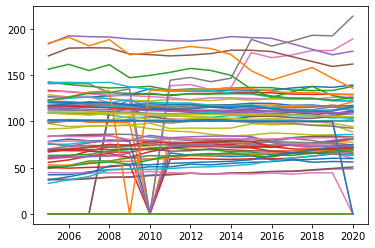

[[ 1.     0.259  0.134  0.511  0.137  0.148  0.41   0.292  0.078  0.019
   0.04   0.131  0.037  0.036 -0.399 -0.405 -0.216 -0.314  0.137  0.052
   0.238  0.247 -0.421 -0.406  0.009]
 [ 0.259  1.     0.712  0.624 -0.823 -0.813 -0.294 -0.456 -0.625 -0.737
  -0.876 -0.817 -0.893 -0.887  0.56   0.508  0.752  0.727  0.801  0.765
   0.592  0.615 -0.488 -0.379 -0.797]
 [ 0.134  0.712  1.     0.674 -0.657 -0.62  -0.721 -0.821 -0.482 -0.531
  -0.582 -0.482 -0.714 -0.708  0.414  0.556  0.809  0.692  0.588  0.625
   0.168  0.166 -0.361 -0.28  -0.733]
 [ 0.511  0.624  0.674  1.    -0.334 -0.339 -0.153 -0.33  -0.439 -0.441
  -0.3   -0.203 -0.456 -0.438 -0.084 -0.093  0.405  0.404  0.566  0.52
   0.065  0.086 -0.555 -0.448 -0.602]
 [ 0.137 -0.823 -0.657 -0.334  1.     0.995  0.556  0.625  0.744  0.865
   0.945  0.888  0.96   0.953 -0.857 -0.807 -0.798 -0.794 -0.61  -0.664
  -0.391 -0.409  0.112  0.001  0.683]
 [ 0.148 -0.813 -0.62  -0.339  0.995  1.     0.523  0.605  0.766  0.883
   0.94   0.892  0.

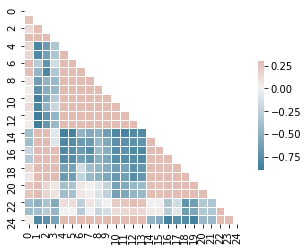

RangeIndex(start=0, stop=38, step=1) RangeIndex(start=0, stop=35, step=1) RangeIndex(start=0, stop=36, step=1)


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %%
def load_data():
    args = []
    prod_df = pd.read_csv('./data/productivity.csv')
    prod_new_df = pd.read_csv('./data/productivity_new.csv')
    sentiment_df = pd.read_csv('./data/sentiment.csv')
    hours_worked_df = pd.read_csv('./data/lfsa_ewhun2_1_Data.csv')
    productivity_df = pd.read_csv('./data/GDP_per_quarter.csv') 
    unem_df = pd.read_csv('./data/unem.csv')
    covid_df = pd.read_csv('./data/DataPerWeek.csv')
    unem_df.fillna(0)
    productivity_df.fillna(0)
    sentiment_df.fillna(0)
    prod_df.fillna(0)
    covid_df.fillna(0)
    args += [prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df]
    return args

# %%
args = load_data()
prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df = args
for i in np.linspace(2005, 2020, 16, endpoint=True):
    prod_df[[str(int(i))]] = prod_df[[str(int(i))]].apply(pd.to_numeric, errors="coerce")
print(prod_df.head(), sentiment_df.head(), hours_worked_df.head(), prod_new_df.head(), productivity_df.head(), unem_df.head(), covid_df.head())

#%%
prod_data = prod_df.iloc[0:71, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float64).T
time_data = np.repeat(np.array([np.linspace(2005, 2020, 16)]).transpose(), 71, 1)
plt.plot(time_data, prod_data)
plt.show()

#%%
corr = np.round(np.corrcoef(prod_df.iloc[0:25, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float16)), 3)
mask = np.triu(np.ones_like(corr, dtype=bool))
print(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#%%
prod_df.head(), productivity_df.head()

#%%
GDP_df = pd.read_excel('./data/GDP_per_quarter_2.xlsx', sheet_name='Sheet 1')
HW_df = pd.read_excel('./data/hours_worked.xlsx', sheet_name='Sheet 1')
employees_df = pd.read_excel('./data/Employees.xlsx', sheet_name='Sheet 1')
print(GDP_df.index, HW_df.index, employees_df.index)
GDP_df = GDP_df.loc[:, ~GDP_df.columns.str.contains('^Unnamed')]
HW_df = HW_df.loc[:, ~HW_df.columns.str.contains('^Unnamed')]
employees_df = employees_df.loc[:, ~employees_df.columns.str.contains('^Unnamed')]
GDP_df.replace(':', np.nan, inplace=True)
HW_df.replace(':', np.nan, inplace=True)
employees_df.replace(':', np.nan, inplace=True)
GDP_df.interpolate(method='linear', inplace=True)
HW_df.interpolate(method='linear', inplace=True)
employees_df.interpolate(method='linear', inplace=True)

def create_per_employeer(GDP_df, HW_df, employees_df):
    ''' This is a function to create a dataframe with the per-employee GDP and per hour worked '''
    cols =(list(set(GDP_df.columns) and set(employees_df.columns) and set(HW_df.columns)))
    cols.sort()
    idx = cols.pop()
    per_employee_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    for i in cols:
        GDP_df[i] = GDP_df[i].apply(pd.to_numeric, errors="coerce")
        employees_df[i] = employees_df[i].apply(pd.to_numeric, errors="coerce")
        HW_df[i] = HW_df[i].apply(pd.to_numeric, errors="coerce")
        per_employee_df[i] = GDP_df[i]/employees_df[i]
        per_HW = per_employee_df[i]/HW_df[i]
    per_employee_df.index = GDP_df[idx]
    per_HW.index = GDP_df[idx]
    return per_employee_df, per_HW
per_employee_df, per_HW = create_per_employeer(GDP_df, HW_df, employees_df)


# print(per_employee_df.head(), per_HW.head())

In [36]:
per_employee_df
# per_employee_df.drop(index='Albania'  , inplace=True)
# per_employee_df.drop(index='Bosnia and Herzegovina'  , inplace=True)
# per_employee_df.drop(index='Kosovo (under United Nations Security Council Resolution 1244/99)'  , inplace=True)

per_employee_df


,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,2010-Q2,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
TIME,,,,,,,,,,,,,,,,,,,,,
Belgium,22.560757,23.873680,22.491755,23.550260,22.360721,22.862207,22.508576,24.419903,22.760715,23.985635,...,27.952909,30.597291,28.022432,26.008691,27.708231,30.384407,29.304520,30.463900,29.654032,32.797095
Bulgaria,2.669705,3.068520,3.510293,3.509900,2.773878,3.265822,3.554014,3.713150,2.888632,3.456519,...,5.689253,6.077220,4.884264,5.341706,6.085626,6.383555,5.217496,5.987118,6.829871,7.387679
Czechia,8.914995,9.921593,10.427240,9.790631,8.334568,9.144258,9.605971,9.819170,9.050971,9.971068,...,13.357356,13.746098,12.450640,11.763819,12.952916,13.390329,12.561665,14.132169,14.303338,14.758361
Denmark,23.352974,24.174315,24.111718,24.406873,23.162066,23.539758,23.785051,25.332092,24.460992,25.571512,...,29.873202,31.011000,30.193802,29.834972,30.970074,32.141322,31.078993,32.465440,32.320438,34.123543
Germany (until 1990 former territory of the FRG),18.930790,19.091448,18.794552,18.690965,17.799558,17.784520,18.453160,18.579709,18.755646,18.934022,...,23.326132,23.477178,551.832360,507.064950,554.953666,569.135284,23.361990,23.589302,24.510983,25.027807
Estonia,6.747880,7.538948,7.210105,7.013278,6.380381,6.795442,6.611883,7.125941,6.808112,7.404242,...,12.533702,12.890639,11.387154,11.943073,12.585698,13.172993,12.172828,13.722078,14.346965,15.535682
Ireland,26.310162,25.666649,25.612371,25.624332,25.678115,25.948846,25.778749,25.473668,26.304957,26.259304,...,47.577504,46.818610,47.308321,45.390123,52.294520,48.852711,53.291592,50.867614,55.131934,17.740377
Greece,19.000034,20.154882,20.978582,20.996393,18.307956,20.325537,20.651731,21.633656,19.178486,19.744833,...,18.362384,17.397246,15.630405,14.654005,16.682628,16.231129,16.549761,16.785722,18.250849,4.204564
Spain,15.807677,16.790067,16.006881,17.463114,16.201118,17.155542,16.493534,17.778941,16.704689,17.591081,...,18.316183,19.365798,17.596664,16.291273,17.654726,18.580803,17.520152,18.331867,17.735874,19.482595


In [37]:
per_employee_df = per_employee_df.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})


In [38]:
per_employee_df['Average GDP'] = per_employee_df.iloc[:,:57].mean(axis=1, skipna=True)
# per_employee_df

In [39]:
age = pd.read_csv(r'/home/katia/Downloads/datasets/EAP_TEAP_SEX_AGE_NB_Q-filtered-2022-04-022.csv')
age = age[['ref_area.label','classif1.label','time','obs_value' ]]
#prod = prod[['geo', 'TIME_PERIOD','OBS_VALUE']]
# age
df_age = age.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# df_education.drop(index='Austria'  , inplace=True)
df_age = df_age.iloc[1:, :]

In [40]:
_1524_employers = age[(age['classif1.label'] == 'Age (10-year bands): 15-24')]
_1524_employers = _1524_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_1524_employers['Employers Average'] = _1524_employers.iloc[:,:57].mean(axis=1, skipna=True)
_1524_employers

time,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,Employers Average
classif1.label,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,...,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,Age (10-year bands): 15-24,
ref_area.label,,,,,,,,,,,,,,,,,,,,,
Australia,2128.719,2092.464,2064.762,2093.883,2136.920,2076.720,2043.630,2102.296,2135.931,2070.331,...,2191.944,2238.182,1971.665,2061.111,2150.191,2183.167,2146.800,2039.864,2112.434,2110.213357
Belgium,426.200,406.700,458.500,442.600,405.400,415.300,437.700,438.700,414.400,404.000,...,406.800,381.300,337.300,410.400,347.800,347.400,373.000,462.600,399.900,400.898214
Bulgaria,290.800,305.700,310.200,296.700,291.100,289.700,291.400,272.700,268.600,282.400,...,150.700,118.700,131.100,144.100,142.500,126.900,118.500,130.800,118.200,204.892857
Croatia,189.400,185.500,204.000,193.000,188.700,195.000,192.800,173.500,186.400,189.600,...,150.900,138.500,133.900,150.000,148.300,145.700,143.100,142.400,NaN,163.341818
Cyprus,39.600,37.400,38.400,40.400,41.300,40.500,39.600,42.100,42.400,42.500,...,36.900,34.300,33.300,34.900,38.000,38.300,39.400,39.500,39.600,39.040385
Czechia,407.200,407.000,426.500,432.600,414.500,412.600,436.800,432.400,394.300,386.300,...,283.400,266.200,250.300,270.300,265.900,256.900,251.900,276.400,270.100,343.341071
Denmark,414.700,443.000,450.600,446.300,443.300,456.000,456.900,429.000,423.000,443.200,...,442.900,424.200,422.300,440.900,425.900,411.100,421.000,435.000,432.700,431.073214
Estonia,73.200,71.200,83.100,84.800,74.200,71.600,78.800,64.000,68.300,67.500,...,53.100,51.400,49.800,53.100,51.000,49.300,50.600,50.500,47.600,60.401786


In [41]:
_2534_employers = age[(age['classif1.label'] == 'Age (10-year bands): 25-34')]
_2534_employers = _2534_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_2534_employers['Employers Average'] = _2534_employers.iloc[:,:57].mean(axis=1, skipna=True)
_2534_employers

time,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,Employers Average
classif1.label,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,...,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,Age (10-year bands): 25-34,
ref_area.label,,,,,,,,,,,,,,,,,,,,,
Australia,2420.988,2443.224,2455.319,2491.468,2491.225,2500.012,2499.521,2504.173,2524.088,2540.021,...,3229.383,3255.741,3149.432,3163.025,3208.951,3212.257,3218.961,3142.822,3145.882,2866.661304
Belgium,1223.900,1225.900,1227.600,1227.800,1227.400,1216.800,1225.000,1236.300,1241.800,1228.300,...,1248.700,1245.400,1210.100,1254.600,1247.500,1273.000,1271.500,1271.000,1284.600,1238.492857
Bulgaria,806.300,796.000,772.000,752.200,741.500,749.800,745.900,731.700,816.500,838.100,...,702.500,684.600,670.200,677.900,670.800,670.800,658.700,660.800,643.600,749.505357
Croatia,504.800,511.400,511.300,501.500,498.600,502.800,495.100,512.100,501.300,491.800,...,435.400,415.200,418.400,427.100,424.600,419.900,410.200,410.200,NaN,469.667273
Cyprus,110.700,111.300,110.600,110.800,109.000,111.300,111.300,114.000,117.400,118.400,...,129.500,130.500,130.300,129.500,132.700,128.100,130.800,131.600,129.300,123.788462
Czechia,1408.000,1399.500,1390.700,1387.800,1382.000,1380.300,1381.500,1389.800,1358.500,1352.800,...,1111.000,1106.500,1084.600,1095.900,1080.000,1076.000,1062.200,1061.600,1046.600,1213.492857
Denmark,588.400,597.500,610.100,593.100,603.500,587.100,582.800,561.800,571.400,558.700,...,635.200,631.400,619.400,642.800,644.500,642.900,649.700,654.100,656.400,581.344643
Estonia,154.900,161.400,164.000,159.500,155.200,153.600,157.700,160.600,156.300,155.600,...,161.000,155.700,147.400,152.700,154.300,155.800,151.300,152.200,157.500,158.176786


In [42]:
_3544_employers = age[(age['classif1.label'] == 'Age (10-year bands): 35-44')]
_3544_employers = _3544_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_3544_employers['Employers Average'] = _3544_employers.iloc[:,:57].mean(axis=1, skipna=True)
_3544_employers

time,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,Employers Average
classif1.label,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,...,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,Age (10-year bands): 35-44,
ref_area.label,,,,,,,,,,,,,,,,,,,,,
Australia,2536.332,2556.598,2569.263,2575.211,2574.756,2591.536,2591.881,2578.199,2560.706,2581.817,...,2915.198,2922.663,2891.756,2924.757,2981.676,3004.804,3034.923,3013.660,3046.353,2724.346589
Belgium,1396.100,1366.800,1389.900,1373.300,1382.800,1356.400,1346.100,1348.200,1375.400,1355.700,...,1267.000,1275.100,1259.500,1290.500,1287.600,1259.300,1288.300,1301.900,1327.500,1309.885714
Bulgaria,972.800,1002.800,1025.400,1036.100,1030.600,1026.800,1011.700,1018.200,889.300,900.500,...,897.900,872.400,866.800,881.300,864.700,844.000,856.500,866.700,854.500,922.551786
Croatia,498.500,494.800,504.700,506.100,498.300,489.700,496.600,495.000,486.100,468.800,...,508.300,509.200,509.900,512.100,512.900,525.300,525.200,515.800,NaN,495.714545
Cyprus,98.600,97.700,96.900,98.000,96.700,98.500,100.300,101.000,100.800,101.200,...,109.400,113.600,113.200,113.500,113.600,114.000,117.200,117.200,119.000,106.009615
Czechia,1332.800,1349.000,1357.700,1366.300,1371.500,1388.500,1403.400,1415.600,1417.400,1432.000,...,1533.400,1528.300,1500.100,1505.900,1491.900,1479.700,1464.000,1463.400,1456.600,1516.176786
Denmark,742.100,736.500,725.400,740.700,723.800,735.200,723.500,720.200,718.600,725.500,...,612.900,611.700,596.900,598.200,602.900,592.600,593.000,602.100,600.700,665.746429
Estonia,166.200,163.900,164.900,165.300,166.300,169.200,162.900,162.000,166.700,167.200,...,163.300,164.900,164.300,164.500,167.900,166.000,164.700,164.500,165.300,163.228571


In [43]:
_4554_employers = age[(age['classif1.label'] == 'Age (10-year bands): 45-54')]
_4554_employers = _4554_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_4554_employers['Employers Average'] = _4554_employers.iloc[:,:57].mean(axis=1, skipna=True)
_4554_employers

time,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,Employers Average
classif1.label,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,...,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,Age (10-year bands): 45-54,
ref_area.label,,,,,,,,,,,,,,,,,,,,,
Australia,2408.168,2432.452,2440.359,2445.546,2459.385,2485.629,2485.818,2489.678,2489.210,2507.289,...,2726.939,2724.252,2692.885,2720.137,2744.585,2741.705,2744.161,2735.453,2750.04,2592.192071
Belgium,1245.200,1245.300,1243.000,1237.500,1285.700,1260.500,1266.300,1281.800,1305.800,1289.500,...,1294.600,1286.700,1294.600,1291.700,1278.700,1256.400,1273.500,1296.800,1274.40,1305.600000
Bulgaria,926.900,932.000,948.500,926.100,893.200,914.400,930.000,898.200,839.700,853.600,...,871.800,864.300,869.800,888.600,885.500,880.000,891.500,896.200,894.60,853.785714
Croatia,473.900,485.700,485.300,478.300,474.000,483.900,467.300,466.500,472.400,471.600,...,405.500,411.500,403.400,399.000,397.600,408.400,415.100,397.800,NaN,444.074545
Cyprus,88.900,89.700,90.400,90.200,87.400,89.600,91.100,90.800,90.200,92.000,...,93.600,91.300,91.200,92.100,90.100,90.300,95.000,97.000,97.30,92.769231
Czechia,1271.000,1271.300,1273.700,1271.100,1268.000,1273.900,1277.500,1272.600,1268.800,1271.300,...,1436.600,1439.200,1452.700,1458.400,1475.300,1475.700,1496.700,1516.700,1520.50,1322.851786
Denmark,655.000,663.200,675.100,674.300,668.800,662.500,684.200,675.200,681.800,676.900,...,711.500,707.900,701.000,701.700,702.800,702.300,709.200,701.900,707.50,698.580357
Estonia,166.600,165.500,169.500,166.700,162.800,166.000,169.400,169.400,167.800,166.200,...,155.600,154.800,156.000,160.000,160.600,161.700,160.500,158.500,157.90,159.698214


In [44]:
_5564_employers = age[(age['classif1.label'] == 'Age (10-year bands): 55-64')]
_5564_employers = _5564_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_5564_employers['Employers Average'] = _5564_employers.iloc[:,:57].mean(axis=1, skipna=True)
_5564_employers

time,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,Employers Average
classif1.label,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,...,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,Age (10-year bands): 55-64,
ref_area.label,,,,,,,,,,,,,,,,,,,,,
Australia,1356.501,1404.106,1425.684,1430.897,1464.252,1490.875,1496.083,1522.825,1535.163,1556.973,...,1994.016,1994.952,1969.980,2011.878,2040.721,2030.445,2056.462,2034.101,2049.954,1753.154482
Belgium,458.600,435.100,484.700,471.900,466.600,481.100,495.800,501.200,511.100,518.200,...,826.000,835.100,846.000,846.700,862.700,862.500,875.700,882.800,888.400,661.591071
Bulgaria,469.100,485.300,488.600,475.300,477.900,489.800,486.100,475.400,521.000,528.500,...,635.400,621.200,631.100,639.100,636.900,620.200,629.200,635.700,624.000,568.280357
Croatia,192.600,210.400,221.400,207.400,214.600,227.700,237.000,235.200,230.500,237.500,...,276.500,269.900,285.000,299.100,289.100,281.600,303.100,324.200,NaN,254.580000
Cyprus,48.200,48.400,48.500,47.600,48.500,52.300,52.500,52.800,53.500,54.900,...,68.200,67.700,68.000,69.100,68.700,68.500,69.500,72.500,72.300,58.017308
Czechia,715.300,727.200,722.100,734.200,739.300,739.200,733.400,723.100,735.300,738.300,...,897.800,892.300,903.300,909.600,918.100,913.800,907.600,933.200,935.200,814.576786
Denmark,429.300,425.300,416.200,407.800,411.100,420.100,418.200,415.000,418.300,427.600,...,542.900,545.100,545.400,556.700,563.200,559.800,563.200,569.500,577.900,471.241071
Estonia,96.900,97.000,98.800,105.100,105.700,103.500,104.600,105.400,104.000,102.900,...,130.300,129.200,129.700,133.300,134.000,126.800,124.900,134.900,133.500,116.612500


In [45]:
over65_employers = age[(age['classif1.label'] == 'Age (10-year bands): 65+')]
over65_employers = over65_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
over65_employers['Employers Average'] = over65_employers.iloc[:,:57].mean(axis=1, skipna=True)
over65_employers

time,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,Employers Average
classif1.label,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,...,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,Age (10-year bands): 65+,
ref_area.label,,,,,,,,,,,,,,,,,,,,,
Australia,252.147,260.030,271.612,266.805,276.751,291.805,306.599,306.702,301.300,321.716,...,609.643,594.823,563.616,594.734,628.669,652.051,646.399,645.669,656.877,444.313250
Belgium,36.600,32.400,34.200,27.300,29.000,21.100,38.000,38.100,41.900,38.500,...,62.100,62.200,61.100,62.500,63.400,56.200,62.500,56.600,66.100,47.971429
Bulgaria,52.700,57.300,57.700,54.800,50.500,52.000,49.400,48.300,40.300,38.000,...,102.900,94.800,102.800,102.600,99.500,90.900,90.800,94.700,92.300,65.280357
Croatia,41.700,46.200,44.600,50.300,54.000,44.700,43.100,54.100,47.500,37.800,...,27.900,28.100,32.000,26.600,26.100,27.000,34.600,27.900,NaN,32.741818
Cyprus,11.800,12.000,11.200,11.900,11.600,11.500,12.200,12.700,12.800,13.000,...,12.300,12.400,12.500,13.000,13.100,14.400,14.700,14.600,16.000,11.186538
Czechia,68.700,69.400,68.000,72.200,74.400,80.800,76.100,78.800,77.300,74.600,...,151.400,150.900,147.700,147.000,147.600,142.700,147.400,151.600,148.900,108.905357
Denmark,50.500,53.800,55.500,59.600,64.000,62.400,58.100,57.800,61.100,61.300,...,99.600,101.100,96.900,106.000,102.000,117.400,115.100,117.900,115.600,84.292857
Estonia,27.500,23.300,23.000,23.300,22.700,16.000,23.600,22.800,22.300,21.800,...,37.200,38.400,36.300,35.400,36.200,34.300,41.300,41.700,37.200,29.087500


In [46]:
total = age[(age['classif1.label'] == 'Age (10-year bands): Total')]
total = total.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
total['Total Employers Average'] = total.iloc[:,:57].mean(axis=1, skipna=True)
total

time,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,Total Employers Average
classif1.label,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,...,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,
ref_area.label,,,,,,,,,,,,,,,,,,,,,
Australia,11102.854,11188.874,11226.999,11303.811,11403.289,11436.576,11423.532,11503.873,11546.397,11578.147,...,13667.123,13730.612,13239.333,13475.642,13754.792,13824.427,13847.706,13611.569,13761.54,12490.880839
Belgium,4786.500,4712.300,4838.000,4780.400,4796.800,4751.000,4809.000,4844.300,4890.500,4834.100,...,5105.300,5085.700,5008.700,5156.400,5087.700,5054.900,5144.500,5271.700,5241.10,4964.450000
Bulgaria,3518.500,3579.100,3602.400,3541.200,3484.800,3522.400,3514.500,3444.400,3375.400,3441.100,...,3361.100,3256.100,3271.800,3333.600,3299.900,3232.700,3245.200,3285.000,3227.20,3364.291071
Croatia,1900.900,1933.900,1971.400,1936.500,1928.100,1943.700,1931.800,1936.500,1924.300,1897.000,...,1804.500,1772.400,1782.800,1813.800,1798.500,1808.000,1831.400,1818.300,NaN,1860.098182
Cyprus,397.900,396.500,396.000,399.000,394.500,403.700,406.900,413.500,417.100,422.000,...,449.800,449.900,448.500,452.200,456.100,453.600,466.500,472.300,473.50,430.811538
Czechia,5202.900,5223.400,5238.700,5264.200,5249.600,5275.200,5308.700,5312.300,5251.700,5255.200,...,5413.600,5383.400,5338.700,5387.000,5378.700,5344.900,5329.800,5402.800,5378.00,5319.314286
Denmark,2879.900,2919.300,2933.000,2921.700,2914.500,2923.300,2923.700,2858.900,2874.200,2893.100,...,3045.100,3021.500,2981.900,3046.200,3041.400,3026.100,3051.200,3080.400,3090.80,2932.278571
Estonia,685.200,682.400,703.200,704.600,686.800,679.900,696.900,684.200,685.500,681.200,...,700.500,694.300,683.600,698.900,703.900,694.000,693.300,702.500,698.90,687.208929


In [47]:
combine1 = total[['Total Employers Average']]
combine1['1524 Employers Average'] = (_1524_employers['Employers Average']  / total['Total Employers Average']) *100
combine1['2544 Employers Average'] = ((_3544_employers['Employers Average'] + _2534_employers['Employers Average'])/ total['Total Employers Average'])*100
combine1['45 plus Employers Average'] = ((_4554_employers['Employers Average'] + over65_employers['Employers Average'])  /total['Total Employers Average'])*100
# combine['Eldery Employers Average'] = (eldery__employers['Old Age Employers Average'] / total['Total Averadge Employees'])*100

combine1

<ipython-input-47-6c2699a79eb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine1['1524 Employers Average'] = (_1524_employers['Employers Average']  / total['Total Employers Average']) *100
<ipython-input-47-6c2699a79eb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine1['2544 Employers Average'] = ((_3544_employers['Employers Average'] + _2534_employers['Employers Average'])/ total['Total Employers Average'])*100
<ipython-input-47-6c2699a79eb9>:4: SettingWithCopyWarning: 
A value is trying 

time,Total Employers Average,1524 Employers Average,2544 Employers Average,45 plus Employers Average
classif1.label,,,,
ref_area.label,,,,
Australia,12490.880839,16.894032,44.760718,24.309777
Belgium,4964.450000,8.075380,51.332546,27.265285
Bulgaria,3364.291071,6.090224,49.700133,27.318269
Croatia,1860.098182,8.781355,51.899509,25.633935
Cyprus,430.811538,9.062056,53.340743,24.130219
Czechia,5319.314286,6.454611,51.316194,26.916198
Denmark,2932.278571,14.700964,42.529761,26.698460
Estonia,687.208929,8.789436,46.769671,27.471371


In [48]:
df1 = (per_employee_df[['Average GDP']])
# corr = df3.corr(aggregate)
# print(corr)
df1['1524 Employers Average'] = combine1[['1524 Employers Average']]
df1['2544 Age Employers Average'] = combine1[['2544 Employers Average']]
df1['45 plus Employers Average'] = combine1[['45 plus Employers Average']]
# df['Eldery Employers Average']= combine[['Eldery Employers Average']]


df1

<ipython-input-48-f0db68adefc2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['1524 Employers Average'] = combine1[['1524 Employers Average']]
<ipython-input-48-f0db68adefc2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['2544 Age Employers Average'] = combine1[['2544 Employers Average']]
<ipython-input-48-f0db68adefc2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Average GDP,1524 Employers Average,2544 Age Employers Average,45 plus Employers Average
TIME,,,,
Belgium,26.394442,8.075380,51.332546,27.265285
Bulgaria,4.501684,6.090224,49.700133,27.318269
Czechia,10.981510,6.454611,51.316194,26.916198
Denmark,28.044733,14.700964,42.529761,26.698460
Germany,58.467741,10.398460,42.911399,28.977888
Estonia,9.670701,8.789436,46.769671,27.471371
Ireland,35.079005,13.158156,50.656564,23.545109
Greece,18.587054,6.087452,54.094960,27.181201
Spain,17.901185,7.535071,52.683958,26.050192


In [49]:
df1.corr()

,Average GDP,1524 Employers Average,2544 Age Employers Average,45 plus Employers Average
Average GDP,1.000000,0.341057,-0.359715,0.123864
1524 Employers Average,0.341057,1.000000,-0.493603,-0.549804
2544 Age Employers Average,-0.359715,-0.493603,1.000000,-0.358602
45 plus Employers Average,0.123864,-0.549804,-0.358602,1.000000
